# __DFN-UFM (Universal Fracture Model) generation - Complex generation by fracture domains__

### Problem statement

The fractured system in a rock mass is conceptualized as a population of individual fractures, each defined by a set of geometrical properties (e.g. center position, size and pole orientation for a disc-shaped fracture, etc.). Statistical properties are dividing in area named fracture domains. Given these properties we generate a stochastic DFN from the statistical model(s).

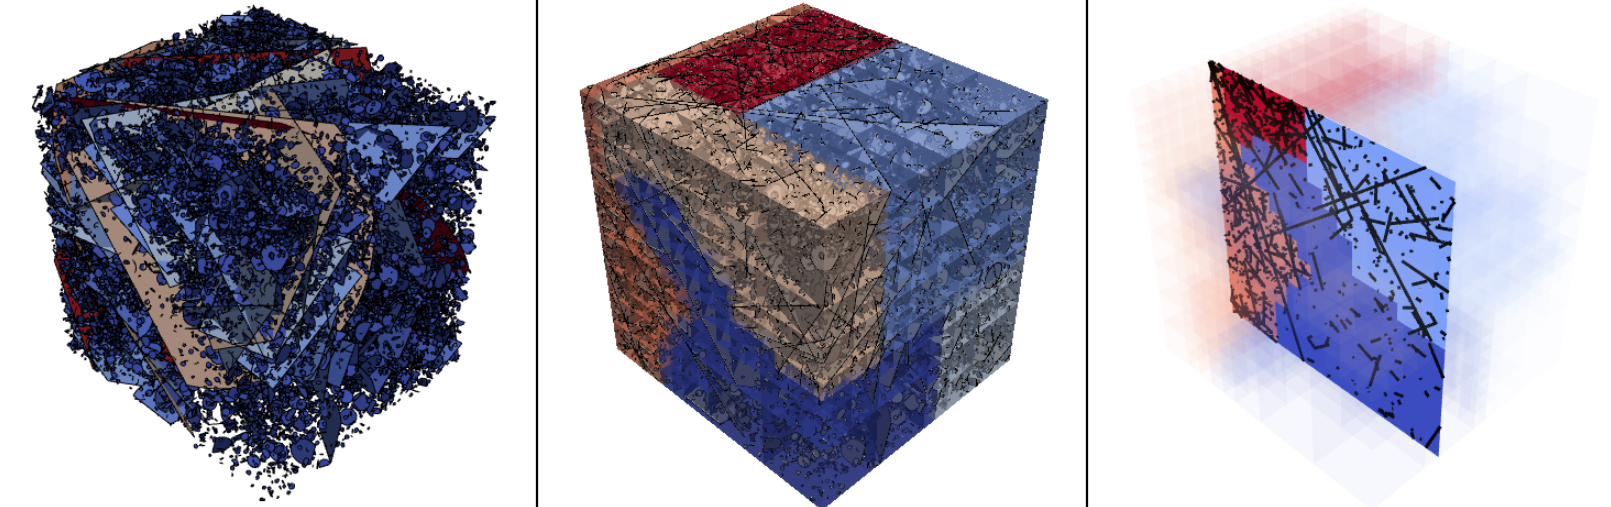

### What will you learn ?
- Load an octree
- Generate a stochastic DFN in a system divided by sub-domains

### DFN.Lab model

Prerequisites:
* Create_domain
* Dividing_in_sub_domains
* Stochastic_DFN_generation


In this tutorial, we will explain how to generate a stochastic DFN within subdomains

The required modules are __DataAnalysis__, __Basis__ and __Generator__.
<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization of generated networks in our notebook.
<br>
Plot functions are implemented in [Tutorials/sources/functions.py](https://gitlab.com/fractorylab/dfnlab/-/blob/new_tutos/Tutorials/sources/functions.py).

In [1]:
import dfnlab.DataAnalysis as dfn_data
import dfnlab.Basis as dfn
import dfnlab.Generator as dfn_gen
import os

________________________

## Load the domain divided in sub-domains

See Dividing_in_sub_domains for details about the parametrization and the creation of an octree from subdomains.



In [2]:
path = os.getcwd()
fileName = os.getcwd()+"/sources/OctreeExample/6domainsLvl4.octree"
system = dfn.System()
system.buildParallelepiped(center=[0, 0, 0], L1=110,L2=120,L3=120) 
system.loadOctree(fileName)

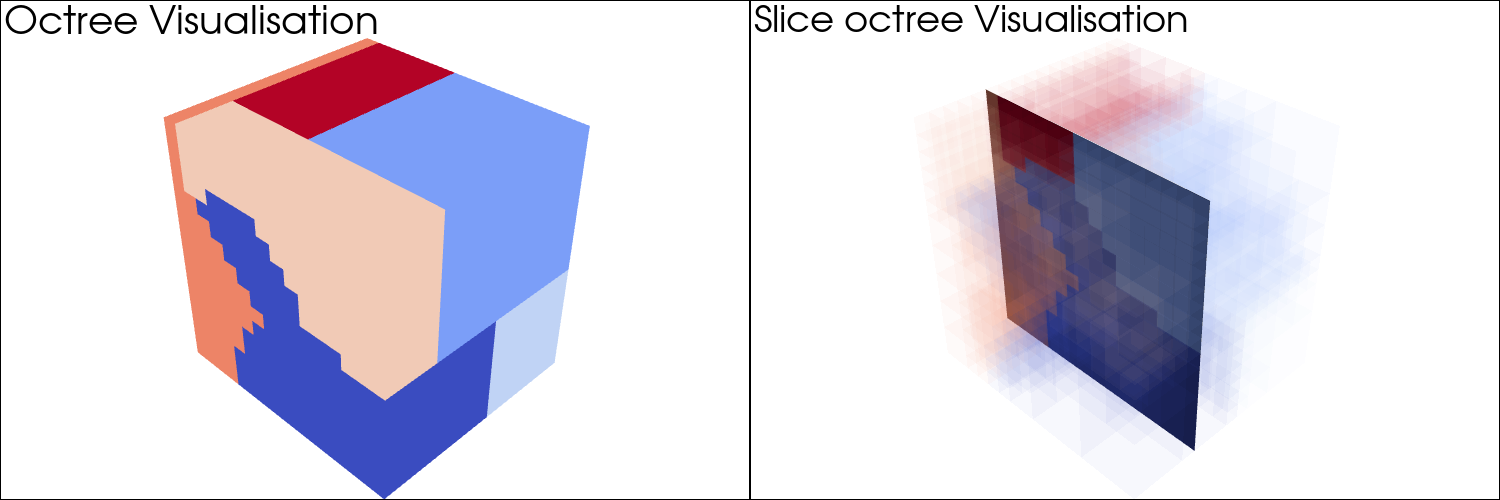

In [3]:
from sources.functions import plot_octree
path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
plot_octree(pathFolder,system)

## Generation of the DFN 
See UFM_DFN_generation for me details
* The nuclei ratio is constrained by the domain weight. However it is not driven by a density per domain target.

In [4]:
fnet = dfn.DFN(system)    
generator = dfn_gen.PoissonGenerator(fnet,1101) # random seed optional
generator.generateByDomains(0) #We use generateByDomains where we used generate() in a DFN not constrained.
print("Number of fractures in the network : ",fnet.nbFractures())

Number of fractures in the network :  67756


## Visualisation

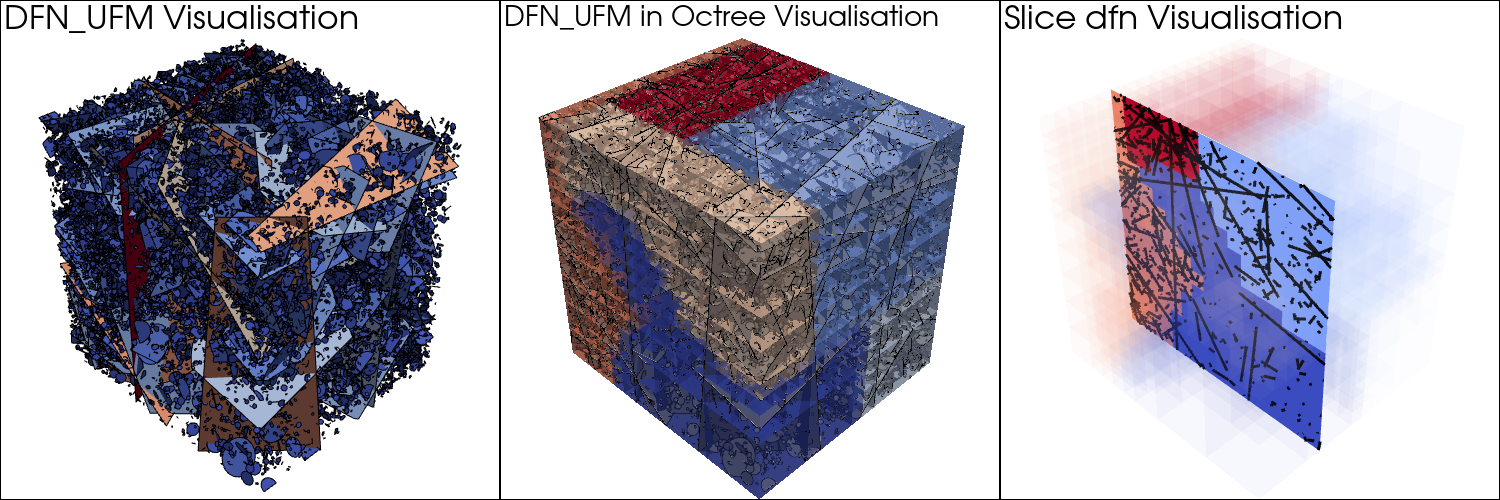

In [5]:
from sources.functions import plot_dfnWithOctree
path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
plot_dfnWithOctree(pathFolder,generator.getDFN())